In [6]:
opts_default = {'rotate': False, 'hold_out': 1/20, 'out_size': -1, 'verbose': False, 'pattern': '*.png'}
opts_default['asdf']

KeyError: 'asdf'

In [6]:
a = dict()
a['asdf'] = []
a['asdf'].append(1)
a['asdf'].append(1)
a['asdf']

[1, 1]

In [65]:
class SimpleLogger:
    def __init__(self, fields, print_format=''):
        if isinstance(print_format, str) and not print_format:
            printstr = ''
            for field in fields:
                printstr = printstr + field + ': %f '
            print_format = printstr
            
        self.print_format = print_format

        self.fields = fields
        
        self.log = dict()
        for field in fields:
            self.log[field] = []
            
    def add(self, input):
        assert(len(input) == len(self.fields))
        
        for i in range(0, len(self.fields)):
            self.log[self.fields[i]].append(input[i])
            
        if isinstance(self.print_format, str):
            print(self.print_format % input)

In [68]:
fields = ('asdf', 'dfsd')

# opts = {'print_format': 'asdf: %f error: %f'}

logger = SimpleLogger(fields)
logger.add((1,2))
print(logger.fields)

asdf: 1.000000 dfsd: 2.000000 
('asdf', 'dfsd')


In [64]:
isinstance('', str)

False

In [13]:

import SimpleLogger as SimpleLogger

import importlib
import numpy as np

import os
import pickle

import math

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

from model_utils import tensor2img
import PIL.Image
from IPython.core.display import display


data_path = './data_{0}x{1}.pyt'.format(str(128), str(128))
if os.path.exists(data_path):
    dp = torch.load(data_path)
else:
    dp = DP.DataProvider(opt.imdir, opts)
    torch.save(dp, data_path)
    
%matplotlib inline

In [515]:
x = dp.get_images([0], 'train')

def imshow(img):
    img = tensor2img(img)
    
    img = img - np.min(img)
    img = img/np.max(img)
    
    img = (img*255).astype('uint8')

    display(PIL.Image.fromarray(img))
    
edgenet = nn.Sequential(nn.Conv2d(3, 1, 3, 1, 0, bias=False), nn.Sigmoid()).cuda(0)    
edgenet[0].bias = None

0.7778317928314209
0.26802921295166016


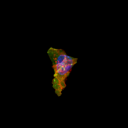

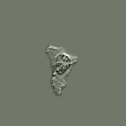

In [561]:
# def weights_init(m):
#     classname = m.__class__.__name__
#     if classname.find('Conv') != -1:
#         m.weight.data.normal_(0.0, 0.02)
#     elif classname.find('BatchNorm') != -1:
#         m.weight.data.normal_(1.0, 0.02)
#         m.bias.data.fill_(0) 

edgenet[0].weight.data.normal_(0, 1)
edgenet[0].weight.data -= torch.mean(edgenet[0].weight.data)
x_edge = edgenet(Variable(x).cuda(0)).data.cpu()
x_edge = torch.cat([x_edge, x_edge, x_edge], 1)

print(torch.max(x_edge))
print(torch.min(x_edge))
imshow(x)
imshow(x_edge)

In [556]:
torch.cat([x_edge, x_edge, x_edge], 1)


( 0 , 0 ,.,.) = 
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
           ...             ⋱             ...          
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000

( 0 , 1 ,.,.) = 
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
           ...             ⋱             ...          
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000

( 0 , 2 ,.,.) = 
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
  0.5000  0.5000  0.5000  ...   0.5000  0.5000  0.5000
           

In [299]:
torch.mean(edgenet[0].weight.data)

-0.028312383219599724